# Home Assignment 5

## Your Name:

## Introduction

The attached file, provided by the World Health Organization (WHO), contains public health data for most countries from 2000-2015.
Throughout the analysis, we shall focus on the following variables:

* Status: Developed or Developing status.
* Life expectancy: life expectancy at birth.
* Alcohol: alcohol, recorded per capita (15+) consumption (in liters of pure alcohol).
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%).
* GDP: Gross Domestic Product per capita (in USD).

### Load and Modify the Data
* Load the data to a Pandas data frame.
* Modify the data frame so that it includes only the 2014 data.
* Set the "Country" column as the data frame's index.
* Modify the data frame so that it includes only the following columns: "Status", "Life expectancy", "Alcohol", "Polio", and "GDP".
* If necessary, modify the columns' names to reflect the data better. For example, you might want to change the column "GDP" to "GDP_PC".
* Drop all the rows (countries) that contain at least one NaN (missing) value.
* Create a new column named "Developed" that gets a value of 1 if the country's status and "Developed" and 0 otherwise.
* Print the resulting data frame.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("C:/Users/eruch/Dropbox/Haifa Courses/Graduate Macroeconomic Theory 2/Python/Data/Life Expectancy Data.csv")
df = df[df["Year"] == 2014]
df = df.set_index("Country")

df = df[["Status", "Life expectancy ", "Alcohol", "Polio", "GDP"]]

new_names = {"Life expectancy ": "Life_Expect", "GDP": "GDP_PC"}
df = df.rename(columns = new_names)
df = df.dropna(how = "any")

df["Developed"] = df["Status"].apply(lambda k: 1 if k == "Developed" else 0)
df

,Status,Life_Expect,Alcohol,Polio,GDP_PC,Developed
Country,,,,,,
Afghanistan,Developing,59.9,0.01,58.0,612.696514,0
Albania,Developing,77.5,4.51,98.0,4575.763787,0
Algeria,Developing,75.4,0.01,95.0,547.851700,0
Angola,Developing,51.7,8.33,68.0,479.312240,0
Antigua and Barbuda,Developing,76.2,8.56,96.0,12888.296670,0
...,...,...,...,...,...,...
Uruguay,Developing,76.8,6.03,95.0,16737.898270,0
Uzbekistan,Developing,69.2,0.01,99.0,25.448414,0
Vanuatu,Developing,71.7,0.01,65.0,3148.365130,0


### Run a Linear Regression

Estimate the following model using OLS:

\begin{equation*}
lexp_i = \beta_0 + \beta_1 * D_i + \beta_2 * alc_i + \beta_3 * D_i * alc_i + \beta_4 * log(gdppc_i) + \beta_5 * log(polio_i)
\end{equation*}

Where:
* $lexp_i$ is the life expectancy in country $i$,
* $D_i$ is an indicator function (dummy variable) that equals one if the country is developed and zero otherwise,
* $alc_i$ is the alcohol consumption in country $i$,
* $gdppc_i$ is the GDP per capita in country $i$,
* and polio_i is the Polion immunization coverage in country $i$.

In estimating the model, use heteroskedasticity-robust standard errors.

Present the estimation's results, including the coefficients, the p values, and basic indices such as R squared.

In [7]:
y = df["Life_Expect"]

X = sm.add_constant(df[["Developed", "Alcohol"]])
X["Alcohol_Developed"] = df["Alcohol"]*df["Developed"]
X[["log_GDP_PC", "log_Polio"]] = np.log(df[["GDP_PC", "Polio"]])

model = sm.OLS(y, X)
results = model.fit(cov_type = "HC3")

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life_Expect   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     36.36
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           3.64e-24
Time:                        18:42:57   Log-Likelihood:                -492.67
No. Observations:                 154   AIC:                             997.3
Df Residuals:                     148   BIC:                             1016.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                43.3667      5.991      7.239      0.000      31.625      55.109
Developed            11.6476      2.101      5.544      0.000       7.530      15.765
Alcohol               0.7966      0.220      3.623      0.000       0.366       1.228
Alcohol_Developed    -0.8717      0.323     -2.697      0.007      -1.505      -0.238
log_GDP_PC            1.5751      0.304      5.173      0.000       0.978       2.172
log_Polio             2.8504      1.291      2.209      0.027       0.321       5.380
==============================================================================
Omnibus:                        4.803   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.830
Skew:                          -0.430   Prob(JB):                       0.0894
Kurtosis:                       2.884   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

### Visualize the Data

* Plot a scatter where the x-axis is the country's log of GDP per capita, and the y-axis is the life expectancy. 
* Plot a regression line in the same figure. **Hint: You should use the regplot() function from the seaborn library.**
* Make sure that the scatter and the line have different colors. 
* Customize the figure and present it.

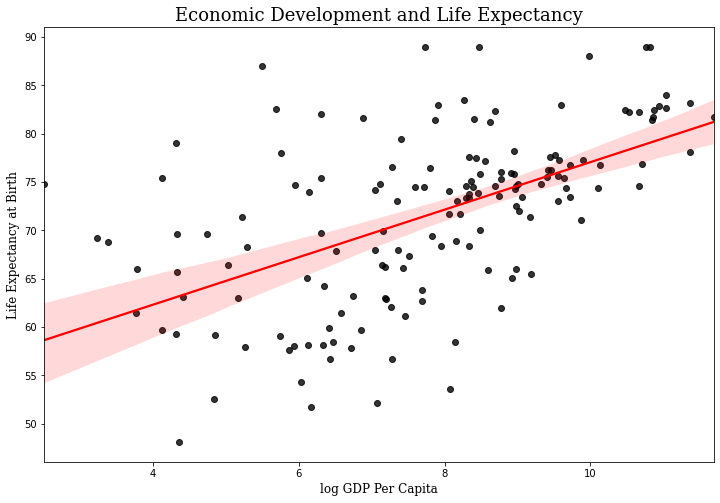

In [170]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.regplot(x = X["log_GDP_PC"], y = df["Life_Expect"], ax = ax, scatter_kws = {"color": "black"},
            line_kws = {"color": "r"})

ax.set_xlabel("log GDP Per Capita", font="Serif", fontsize=12)
ax.set_ylabel("Life Expectancy at Birth", font="Serif", fontsize=12)
ax.set_title("Economic Development and Life Expectancy", font="Serif", fontsize=18)

plt.show()